# Introduction to the CT-INT solver

This notebook gives a quick introduction to the CT-INT solver.

In [41]:
%matplotlib inline
import numpy as np
from triqs.gf import *
from h5 import *
import triqs.utility.mpi as mpi
from triqs.plot.mpl_interface import *

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'xx-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## For another notebook

Text(0.5, 0, '$\\omega$')

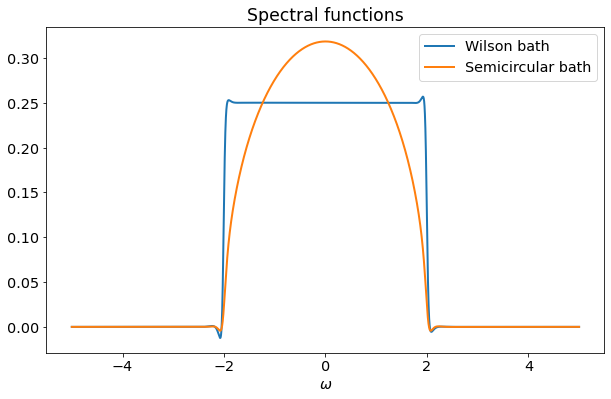

In [42]:
g = GfImFreq(indices=[0], beta=100)
g << Wilson(2.0)
g_real = GfReFreq(indices=[0], window=[-5,5])
g_real.set_from_pade(g)
oplot(-g_real.imag/np.pi, lw=2, label='Wilson bath')

g << SemiCircular(2.0)
g_real = GfReFreq(indices=[0], window=[-5,5])
g_real.set_from_pade(g)
oplot(-g_real.imag/np.pi, lw=2, label='Semicircular bath')

plt.title("Spectral functions")
plt.ylabel("")
plt.xlabel("$\omega$")

## Parameters

The physical problem we will investigate is a simple Anderson impurity model. The impurity
is connected to a flat bath.

In [43]:
# Parameters
beta = 20.0
n_iw = 200
U = 1.0
delta = 0.1
n_cycles = 10**9
max_time = 10

mu = U/2 + 0.5

## CT-INT solver

In [44]:
from triqs_ctint import Solver as SolverINT

Sint = SolverINT(beta, n_iw)

Sint.G0_iw << inverse(iOmega_n + mu - Wilson(2.0))

Sint.solve(U, delta, n_cycles, max_time = 10)
hist = Sint.histogram
print("Average order = ", np.sum(np.arange(len(hist)) * hist))

Average order =  1.8261006965073507


Text(0.5, 0, '$\\omega$')

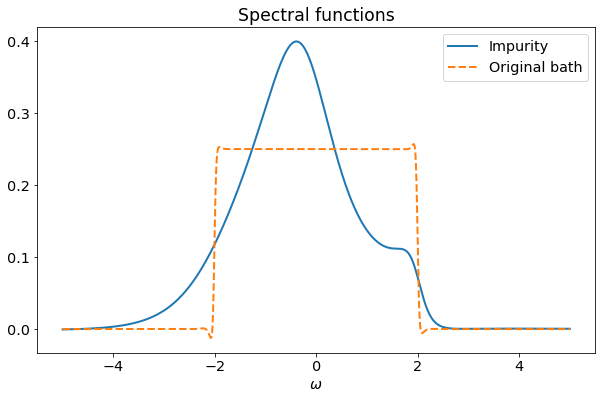

In [45]:
g_real = GfReFreq(indices=[0], window=[-5,5])
g_real.set_from_pade(Sint.G_iw['up'])
oplot(-g_real.imag/np.pi, lw=2, label='Impurity')

g << Wilson(2.0)
g_real = GfReFreq(indices=[0], window=[-5,5])
g_real.set_from_pade(g)
oplot(-g_real.imag/np.pi, '--', lw=2, label='Original bath')


plt.title("Spectral functions")
plt.ylabel("")
plt.xlabel("$\omega$")

## Perturbation order

Here we can have a look at the average perturbation order versus $U$.

## Green functions and self-energy

This can be an occation to implement Dyson's equation.